# Figure 2: Plot SSH data

In [1]:
#%matplotlib widget 
%matplotlib inline

import sys
sys.path.append("../")  # adds upper level to working directory
# somehow the other way does not work
from utils.plot_utils import finished_plot


import matplotlib.pyplot as plt
import cmocean as cmo
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy
import matplotlib.colors as colors
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
# import seawater as sw

################################
# path to save plots
plotsave = './plots/'

In [2]:
# load data
ssh_obs = xr.open_dataset('../data/Ryanetal2020_figure2_altimetry.nc')
ssh_orca = xr.open_dataset('../data/Ryanetal2020_figure2_ogcm.nc')

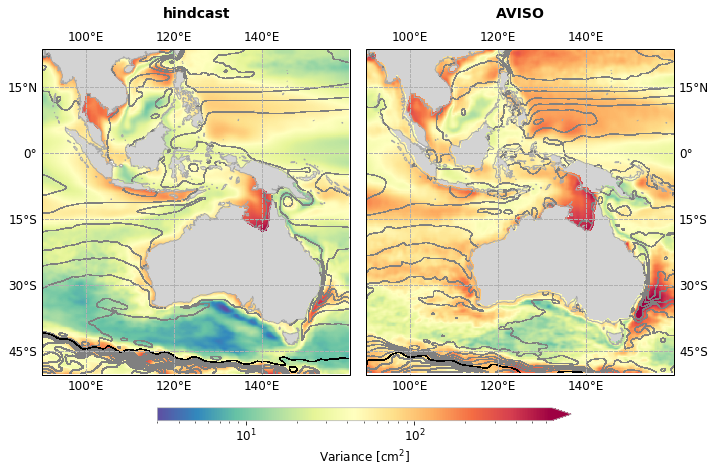

In [3]:
proj = ccrs.PlateCarree()
plt.rcParams.update({'font.size': 12})

fig,ax = plt.subplots(ncols=2,figsize=(11.5,6),subplot_kw = dict(projection=proj),constrained_layout=True)
plt.subplots_adjust(wspace=0.02)

# orca
cc = ax[0].pcolormesh(ssh_orca.nav_lon,ssh_orca.nav_lat,ssh_orca['model_variance'],
                      norm=colors.LogNorm(vmin=3, vmax=650),cmap=plt.get_cmap('Spectral_r'));
cc1 = ax[0].contour(ssh_orca.nav_lon,ssh_orca.nav_lat,ssh_orca['model_mean'],levels=np.arange(-100,140,10),
                    colors='gray',linewidth=0.5);
cc1 = ax[0].contour(ssh_orca.nav_lon,ssh_orca.nav_lat,ssh_orca['model_mean'],levels=[0],
                    colors='k',linewidth=0.5);
# ax[0].clabel(cc1,[0,10,20,30,40],inline=True,fmt='%1d',colors='k')
# altimetry
ax[1].pcolormesh(ssh_obs.longitude,ssh_obs.latitude,ssh_obs['alti_variance'],norm=colors.LogNorm(vmin=3, vmax=650),
                cmap=plt.get_cmap('Spectral_r'));
cc1 = ax[1].contour(ssh_obs.longitude,ssh_obs.latitude,ssh_obs['alti_mean'],levels=np.arange(-140,140,10),
                    colors='gray',linewidth=0.5);
cc1 = ax[1].contour(ssh_obs.longitude,ssh_obs.latitude,ssh_obs['alti_mean'],levels=[0],
                    colors='k',linewidth=0.5);
# ax[1].clabel(cc1,[0,10,20,30,40],inline=True,fmt='%1d',colors='k')


# colorbar
cbaxes = fig.add_axes([0.27, 0.02, 0.5, 0.03]) 
cb = plt.colorbar(cc,orientation='horizontal', cax = cbaxes,label='Variance [cm$^2$]',extend='max')

ax[0].set_title('hindcast',y=1.08,fontweight='bold',fontsize=14)
ax[1].set_title('AVISO',y=1.08,fontweight='bold',fontsize=14)

for i in range(2):
    ax[i].set_extent([90,160,-45,20])
    ax[i].coastlines(resolution='50m',color='darkgray')
    ax[i].add_feature(cartopy.feature.LAND, color='lightgray')
    gl = ax[i].gridlines(crs=proj,draw_labels=True,
                            xlocs=range(60,180,20),ylocs=range(-60,45,15))
    gl.yformatter = LATITUDE_FORMATTER
    gl.xformatter = LONGITUDE_FORMATTER
    if i==0: gl.ylabels_right = False
    else: gl.ylabels_left = False
        
# finished_plot(fig,'/climodes/data4/sryan/plots_rev/Fig2_SSH_validation.png')    